<a href="https://colab.research.google.com/github/hyeon9698/Donghyeon_Cho/blob/main/MLOps/week_1/deep_learning_fundamentals_part1_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.10


In [ ]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [ ]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [ ]:
!nvidia-smi

Sun Mar 28 14:35:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
import numpy as np
X = np.zeros((3,2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
X.shape, X.dtype

((3, 2), dtype('float64'))

In [ ]:
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [ ]:
X[:,0] = 5
X

array([[5., 1.],
       [5., 0.],
       [5., 0.]])

In [ ]:
X = np.array([
    [1,2],
    [3,4],
    [5,6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
x = np.array([10, 20])
print(X.shape, x.shape)
X+x

(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [ ]:
x.shape

(2,)

In [ ]:
X*x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [ ]:
x = np.array([[10, 20],]).T
print(X)
print(x)

[[1 2]
 [3 4]
 [5 6]]
[[10]
 [20]]


In [ ]:
X @ x

array([[ 50],
       [110],
       [170]])

Indexing

In [ ]:
X = np.random.rand(3, 2)
X

array([[0.6012342 , 0.68027734],
       [0.64394184, 0.71873203],
       [0.95469188, 0.08269085]])

In [ ]:
X[X>0.5] = 55
X

array([[55.        , 55.        ],
       [55.        , 55.        ],
       [55.        ,  0.08269085]])

<Figure size 432x288 with 0 Axes>

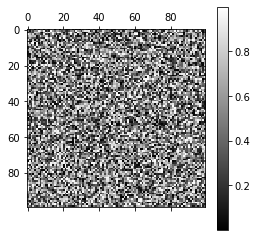

In [10]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')
X = np.random.rand(100,100)
plt.matshow(X)
plt.colorbar()

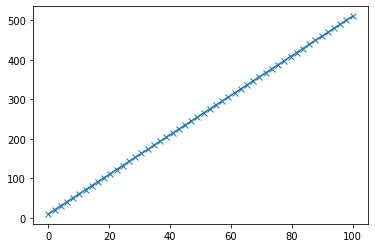

In [11]:
x = np.linspace(0,100)
y = x*5 + 10
plt.plot(x, y, 'x-')

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


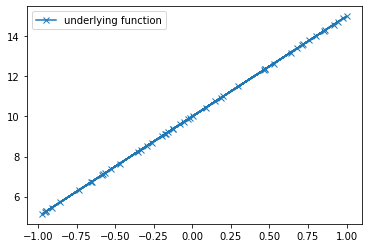

In [35]:
n = 50
d = 1
x = np.random.uniform(-1, 1, (n, d))
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')
plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

Basic prediction function: Linear

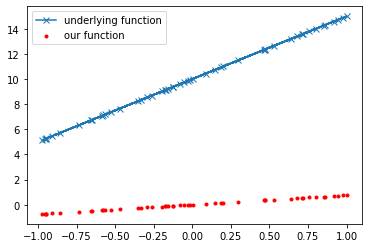

In [36]:
class Linear:
    def __init__(self, num_input, num_output=1):
        self.weights = np.random.randn(num_input, num_output) * np.sqrt(2. / num_input)
        self.bias = np.zeros((1))
    def __call__(self, x):
        return x @ self.weights + self.bias
linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

Basic loss function: MSE

In [37]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_ture = y_true
        return ((y_true - y_pred) ** 2).mean()
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 106.54786428980734


Add back propagation

In [38]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true - y_pred) ** 2).mean()
    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        return self.gradient
class Linear:
    def __init__(self, input_dim: int, num_hidden: int = 1):
        self.weights = np.random.randn(input_dim, num_hidden) - 0.5
        self.bias = np.random.randn(1) - 0.5
    def __call__(self, x):
        self.x = x
        output = x @ self.weights + self.bias
        # return self.x @ self.weights + self.bias
        return output
    # y = w*x + b
    # dy/dx = w
    # dy/dw = x
    # dy/db = 1
    def backward(self, gradient):
        self.weights_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum()
        self.x_gradient = gradient @ self.weights.T
        return self.x_gradient
    def update(self, lr):
        self.weights = self.weights - lr*self.weights_gradient
        self.bias = self.bias - lr*self.bias_gradient

In [39]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

96.59595338791121
65.05869614012069


Epoch 0, loss 114.54377811896018
Epoch 5, loss 17.367653657244038
Epoch 10, loss 4.262883682251213
Epoch 15, loss 1.5922782659789332
Epoch 20, loss 0.707745592240815
Epoch 25, loss 0.3299509352057502
Epoch 30, loss 0.15557949032293117
Epoch 35, loss 0.073550713404225
Epoch 40, loss 0.034791960151750165
Epoch 45, loss 0.0164599825346115
Epoch 50, loss 0.007787411305179811
Epoch 55, loss 0.0036843414185496826


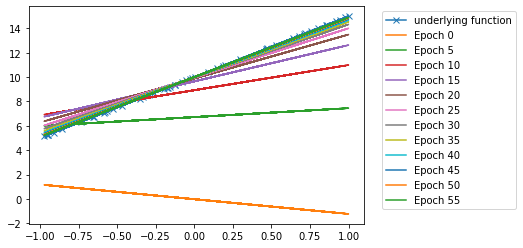

In [40]:
plt.plot(x, y_true, marker='x', label='underlying function')
loss = MSE()
linear = Linear(d)
num_epochs = 60
lr = 0.1
for epoch in range(num_epochs):
    y_pred = linear(x)
    loss_value = loss(y_pred, y_true)
    if epoch % 5 == 0:
        print(f'Epoch {epoch}, loss {loss_value}')
        plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')
    gradient_from_loss = loss.backward()
    linear.backward(gradient_from_loss)
    linear.update(lr)
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

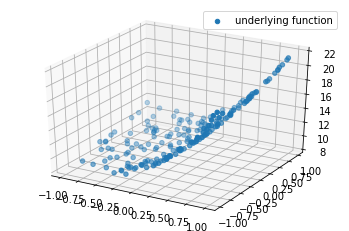

In [44]:
def plot_3d(x, y, y_pred=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:,0], x[:, 1], y, label='underlying function')
    if y_pred is not None:
        ax.scatter(x[:,0], x[:,1], y_pred, label='our function')
    plt.legend()
plot_3d(x, y_true)

Epoch 0, loss 2.302153713862923
Epoch 1, loss 2.295846072818625
Epoch 2, loss 2.290332867107821
Epoch 3, loss 2.285513640452061
Epoch 4, loss 2.2813006998135763
Epoch 5, loss 2.277617482410762
Epoch 6, loss 2.274397134459179
Epoch 7, loss 2.271581273344624
Epoch 8, loss 2.2691189089956936
Epoch 9, loss 2.2669655036066145
Epoch 10, loss 2.265082151710348
Epoch 11, loss 2.2634348650217486
Epoch 12, loss 2.2619939485389704
Epoch 13, loss 2.2607334561682597
Epoch 14, loss 2.2596307156694335
Epoch 15, loss 2.2586659140443364
Epoch 16, loss 2.257821735638653
Epoch 17, loss 2.2570830462239804
Epoch 18, loss 2.2564366171929304
Epoch 19, loss 2.255870884753167
Epoch 20, loss 2.2553757396616527
Epoch 21, loss 2.254942343611128
Epoch 22, loss 2.254562968877957
Epoch 23, loss 2.2542308582736688
Epoch 24, loss 2.2539401028200508
Epoch 25, loss 2.2536855348968015
Epoch 26, loss 2.2534626348976587
Epoch 27, loss 2.253267449681197
Epoch 28, loss 2.2530965213206353
Epoch 29, loss 2.2529468248473994


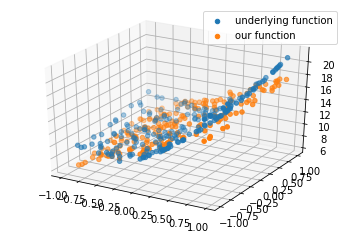

In [48]:
from typing import Callable
def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    for epoch in range(num_epochs):
        y_pred = model(x)
        loss_value = loss(y_pred, y)
        print(f'Epoch {epoch}, loss {loss_value}')
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=30)
plot_3d(x, y_true, linear(x))

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


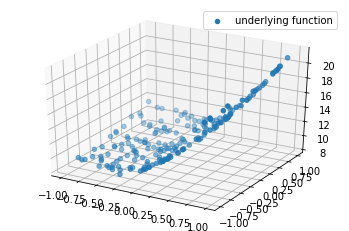

In [46]:
n = 200
d = 2
x = np.random.uniform(-1, 1, (n, 2))
weights_true = np.array([[5,1],]).T
bias_true = np.array([10])
y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')
plot_3d(x, y_true)

Epoch 0, loss 157.2469350378982
Epoch 1, loss 104.4003387953889
Epoch 2, loss 70.29865573754824
Epoch 3, loss 48.1936697118262
Epoch 4, loss 33.77962999218305
Epoch 5, loss 24.3075145388101
Epoch 6, loss 18.020718704042316
Epoch 7, loss 13.79549835404166
Epoch 8, loss 10.911849383333665
Epoch 9, loss 8.907483459183386
Epoch 10, loss 7.484744152785829
Epoch 11, loss 6.451253714261883
Epoch 12, loss 5.682053263833267
Epoch 13, loss 5.095440610063881
Epoch 14, loss 4.63753910460468
Epoch 15, loss 4.272433175470974
Epoch 16, loss 3.975854251692027
Epoch 17, loss 3.731132168221043
Epoch 18, loss 3.526593082354218
Epoch 19, loss 3.3538817918459305
Epoch 20, loss 3.206875493962901
Epoch 21, loss 3.0809765581414212
Epoch 22, loss 2.9726487055598145
Epoch 23, loss 2.879109960058329
Epoch 24, loss 2.7981269615988236
Epoch 25, loss 2.727875153204602
Epoch 26, loss 2.666842066026781
Epoch 27, loss 2.6137590475408587
Epoch 28, loss 2.5675519695261073
Epoch 29, loss 2.527304776123549
Epoch 30, loss 

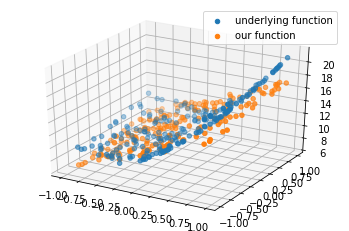

In [49]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

In [51]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    def backward(self, output_gradient):
        self.input_gradient = (self.input_ > 0) * output_gradient
        return self.input_gradient
relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


Train our new non-linear model

161.33126414297016


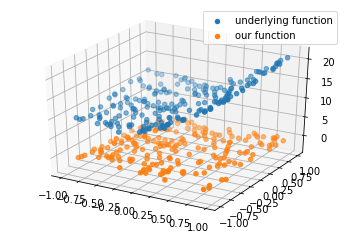

In [52]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [124]:
# Test just one forward and backward step
np.random.seed(4)
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.01)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

145.8977170663112
140.41375953340685


Epoch 0, loss 140.41375953340685
Epoch 1, loss 135.14339274124785
Epoch 2, loss 130.08796158211786
Epoch 3, loss 125.23853935407944
Epoch 4, loss 120.58346265432621
Epoch 5, loss 116.11584588864228
Epoch 6, loss 111.82638602139905
Epoch 7, loss 107.69923145011118
Epoch 8, loss 103.73299741972158
Epoch 9, loss 99.91941322110993
Epoch 10, loss 96.2462789528961
Epoch 11, loss 92.7100258609779
Epoch 12, loss 89.30612060068891
Epoch 13, loss 86.04375409428933
Epoch 14, loss 82.91056131101479
Epoch 15, loss 79.89630347796025
Epoch 16, loss 77.01023067622184
Epoch 17, loss 74.2468847740316
Epoch 18, loss 71.60495781188065
Epoch 19, loss 69.0781435344762
Epoch 20, loss 66.65548630982707
Epoch 21, loss 64.32980814751193
Epoch 22, loss 62.09559953906579
Epoch 23, loss 59.955548341765756
Epoch 24, loss 57.912640965558296
Epoch 25, loss 55.96074703668839
Epoch 26, loss 54.10385810425499
Epoch 27, loss 52.333107991760265
Epoch 28, loss 50.64550777714054
Epoch 29, loss 49.04211054242083
Epoch 30, lo

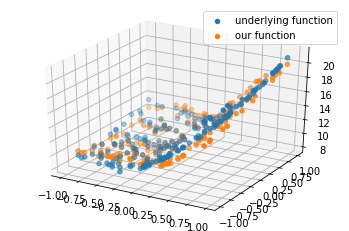

In [125]:
fit(x, y_true, model=model, loss=loss, lr=0.01, num_epochs=100)
plot_3d(x, y_true, model(x))

tensor(142.2332, grad_fn=<MseLossBackward>)


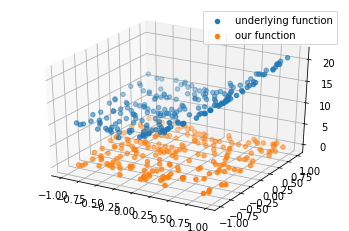

In [126]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
plot_3d(x, y_true, y_pred)

In [127]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(142.2332, grad_fn=<MseLossBackward>)
tensor(23.8981, grad_fn=<MseLossBackward>)


tensor(23.8981, grad_fn=<MseLossBackward>)
tensor(104.8664, grad_fn=<MseLossBackward>)
tensor(126.4981, grad_fn=<MseLossBackward>)
tensor(84.7595, grad_fn=<MseLossBackward>)
tensor(58.0138, grad_fn=<MseLossBackward>)
tensor(40.8260, grad_fn=<MseLossBackward>)
tensor(29.6886, grad_fn=<MseLossBackward>)
tensor(22.3021, grad_fn=<MseLossBackward>)
tensor(16.9563, grad_fn=<MseLossBackward>)
tensor(12.3013, grad_fn=<MseLossBackward>)
tensor(8.0184, grad_fn=<MseLossBackward>)
tensor(5.0190, grad_fn=<MseLossBackward>)
tensor(3.4848, grad_fn=<MseLossBackward>)
tensor(2.5677, grad_fn=<MseLossBackward>)
tensor(1.9448, grad_fn=<MseLossBackward>)
tensor(1.5015, grad_fn=<MseLossBackward>)
tensor(1.1988, grad_fn=<MseLossBackward>)
tensor(0.9820, grad_fn=<MseLossBackward>)
tensor(0.8335, grad_fn=<MseLossBackward>)
tensor(0.7286, grad_fn=<MseLossBackward>)
tensor(0.6520, grad_fn=<MseLossBackward>)
tensor(0.5970, grad_fn=<MseLossBackward>)
tensor(0.5566, grad_fn=<MseLossBackward>)
tensor(0.5263, grad_fn

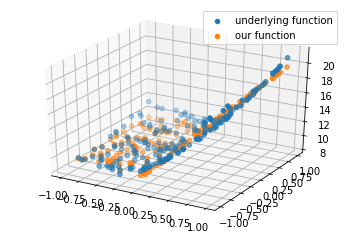

In [128]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())